# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64', no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

### Train the Agent

Run the next code cell to train the DDPG Agent

In [3]:
from agent import Agent

%load_ext autoreload
%autoreload 2

In [4]:
# hyperparameters
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 128        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-4         # learning rate of the actor 
LR_CRITIC = 1e-4        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay

ACTOR_LAYERS = [256, 128]
CRITIC_LAYERS = [256, 128]

In [5]:
agent = Agent(env, BUFFER_SIZE,
              BATCH_SIZE, GAMMA, TAU, LR_ACTOR, LR_CRITIC, WEIGHT_DECAY,
              ACTOR_LAYERS, CRITIC_LAYERS)

Running on cuda:0...


In [6]:
scores = agent.train(1000)

Episode: 	128 	Score: 	36.46 	Mean Scores: 	30.24
Environment solved in 128 episodes!	Mean Scores: 30.24


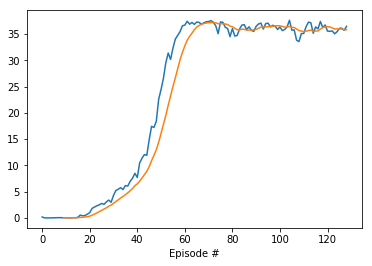

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

scores_df = pd.DataFrame(scores, columns=['scores'])
fig = plt.figure()
ax = fig.add_subplot(111)
scores_df.scores.plot()
plt.plot(scores_df.scores.rolling(10).mean())
plt.xlabel('Episode #')
plt.show()